In [54]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
from english_words import english_words_set

from skimage import io, color, filters
from skimage.transform import resize, rotate

In [23]:
len(english_words_set)

25487

In [55]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot');

In [56]:
english_words_list = list(english_words_set)

In [72]:
shortlst = english_words_list[:100]


In [21]:
# x = 0
# while x <= 10:
#     for word in english_words_set:
#         print(word)
#         print(x)
#         x = x + 1 


In [8]:
text = 'Now is the time for all good men to come to the aid of their country'

In [58]:
def make_image(word):
    y = word 
    plt.text(1,1, y, size = 'xx-large')
    plt.xlim([0,2])
    plt.ylim([0,2])
    plt.axis('off')
    plt.savefig(f'Img/{y}.jpg')
    plt.close()
    X = np.array(Image.open(f'Img/{y}.jpg'))
    return X, y 

(0.0, 2.0, 0.0, 2.0)

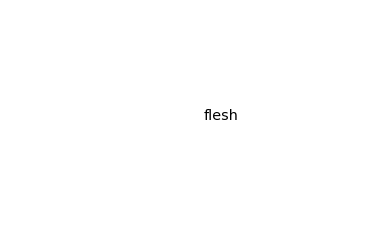

In [71]:
y = word 
plt.text(1,1, y, size = 'x-large')
plt.xlim([0,2])
plt.ylim([0,2])
plt.axis('off')

In [73]:
images = []
labels = [] 
indices = [] 
for idx, wrd in enumerate(shortlst): 
    img, lab = make_image(wrd)
    images.append(img)
    labels.append(lab)
    indices.append(idx)

In [74]:
df = pd.DataFrame()
df["Labels"] = labels
df["Images"] = images
df["Class"] = indices
df.head()

,Labels,Images,Class
0,Semiramis,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,exist,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",1
2,Eugenia,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",2
3,illustrious,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",3
4,bothersome,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",4


In [75]:
lb = LabelBinarizer()
new_labels = lb.fit_transform(indices)
lb.classes_
new_labels

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])

In [76]:
from sklearn.model_selection import train_test_split 
X = np.array(images)
y = np.array(new_labels)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)


In [83]:
X.shape

(100, 288, 432, 3)

In [84]:
y.shape

(100, 100)

In [77]:
def define_model(input_shape, nb_classes, dropout, nb_filters, kernel_size,  pool_size, activation='tanh',optimizer='adadelta'):    
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation(activation))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation(activation))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation(activation))

    model.add(Dropout(dropout))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer=optimizer)
                  #metrics=['accuracy'], learning)
    return model

In [82]:
y_train.shape

(80, 100)

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 285, 429, 12)      588       
_________________________________________________________________
activation_8 (Activation)    (None, 285, 429, 12)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 282, 426, 12)      2316      
_________________________________________________________________
activation_9 (Activation)    (None, 282, 426, 12)      0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 141, 213, 12)      0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 141, 213, 12)      0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 360396)           

In [78]:

# important inputs to the model: don't changes the ones marked KEEP in the functions above
batch_size = 5000  # number of training samples used at a time to update the weights
nb_epoch = 2       # number of passes through the entire train dataset before weights "final"
nb_filters = 12    # number of convolutional filters to use
pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
dropout = 0.1
activation='tanh'
optimizer='adadelta'
img_rows, img_cols = X_train.shape[1],X_train.shape[2]
input_shape = (img_rows,img_cols,3)
nb_classes = len(indices)

model = define_model(input_shape, nb_classes, dropout, nb_filters, kernel_size, pool_size)

# during fit process watch train and test error simultaneously
model.fit(X_train, y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(X_test, y_test))

score = model.evaluate(X_test, y_test, verbose=0)


Model flattened out to  (None, 360396)
Epoch 1/2
1/1 [==============================] - 10s 10s/step - loss: 4.6986 - val_loss: 4.6126
Epoch 2/2
1/1 [==============================] - 9s 9s/step - loss: 4.6478 - val_loss: 4.6462


In [80]:
print('Test score:', score)
print('Test accuracy:', score[1])  # this is the one we care about

Test score: 4.64615535736084


TypeError: 'float' object is not subscriptable